<a href="https://colab.research.google.com/github/ckashby/AndroidWear/blob/master/10_03_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with Keras

_Authors: Justin Pounders (ATL) and Riley Dallas (ATX)_

---


### Learning Objectives

- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`



In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset.

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [7]:
X, y = make_regression(n_samples = 10_000, n_features = 20, random_state = 42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 42)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [11]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Your first Neural Network!!
---

Next stop, [The Singularity](https://en.wikipedia.org/wiki/Technological_singularity)!

Creating a model in `keras` entails a few steps:
1. Create your network topology
2. Compile your model
3. Fit your model

We'll cover each step in the cells below.

### Create your network topology
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer.

For *all* regression problems, your output layer will be 1 neuron with *no* activation function.

In [29]:
model = Sequential()

# Keras combines input and hidden layer when using Sequential
model.add(Dense(32, # number of neurons, base 2 larger than num of features
                activation = 'relu', #ReLU will be used for most of our hidden layers
                input_shape = (20,) # What is the .shape of one sample of X, need to specify input_shape since first layer
                ))
# Just for fun, adding another hidden layer
model.add(Dense(32, activation = 'relu'))
# Output Layer
# Because it's regression, we have 1 neuron with Linear(None) activation
model.add(Dense(1, activation = None))


### Compile your model
---

Whenever you compile your model, you have to specify a few things:
1. What [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [30]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [31]:
model.fit(X_train_sc, y_train,
          epochs = 10,
          batch_size = 512, #base 2 recommended
          validation_data = (X_test_sc, y_test))

Epoch 1/10
15/15 [==============================] - 1s 14ms/step - loss: 0.3055 - val_loss: 0.2204
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.2004 - val_loss: 0.1791
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1676 - val_loss: 0.1568
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1500 - val_loss: 0.1434
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1386 - val_loss: 0.1350
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1308 - val_loss: 0.1287
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1250 - val_loss: 0.1237
Epoch 8/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1203 - val_loss: 0.1200
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1163 - val_loss: 0.1165
Epoch 10/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1127 - val_loss: 0.1134


### Model predictions
---

Your `keras` model has a `.predict()` method, similar to `sklearn`. The only difference is `keras` returns a 2D `numpy` matrix (`sklearn` returns a 1D `numpy` array).

Try it out in the cell below.

In [32]:
model.predict(X_test_sc)[:, 0] # .predict() in keras spits out multi-dimensional array, have to index into it

79/79 [==============================] - 0s 2ms/step


array([0.7972413 , 1.1037306 , 0.8615085 , ..., 0.69259804, 0.5712013 ,
       0.94512564], dtype=float32)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(y_test, model.predict(X_test_sc)[:, 0])

79/79 [==============================] - 0s 2ms/step


0.11336465861098295

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [37]:
X, y = make_classification(n_samples = 10_000, n_features = 20, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [40]:
X_train_sc[:,0], X_train_sc.shape

(array([-1.48256705,  1.58733106, -0.63227657, ...,  1.23781767,
        -0.01388106,  0.43163711]),
 (7500, 20))

### Network Topology for Binary Classification
---

We'll create a simple network with:
- an input layer,
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer.

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Sigmoid squashes the output of our neuron to a value between 0 and 1, which is great for predicting probabilities. We'll use the probability for our loss function in the next step.

In [41]:
model = Sequential()

# input/hidden layer
model.add(Dense(32,
                activation = 'relu',
                input_shape = (20,)))
# Binary Classification Problem -> 1 neuron, SIGMOID!
model.add(Dense(1,
                activation = 'sigmoid'))


### Compile your model
---

Whenever you compile your model, you have to specify a few things:
1. What loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [42]:

# with accuracy as a metric
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

When you fit a model, `keras` returns a `History` object. We need that in the next step, but for now, just save it to a variable.

In [44]:
res = model.fit(X_train_sc, y_train,
                epochs = 10,
                batch_size = 512,
                validation_data = (X_test_sc, y_test))

Epoch 1/10
15/15 [==============================] - 0s 8ms/step - loss: 0.3778 - accuracy: 0.8816 - val_loss: 0.3679 - val_accuracy: 0.8812
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.3617 - accuracy: 0.8835 - val_loss: 0.3527 - val_accuracy: 0.8836
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.3481 - accuracy: 0.8847 - val_loss: 0.3396 - val_accuracy: 0.8860
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.3365 - accuracy: 0.8867 - val_loss: 0.3285 - val_accuracy: 0.8884
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.3267 - accuracy: 0.8887 - val_loss: 0.3192 - val_accuracy: 0.8900
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.3185 - accuracy: 0.8905 - val_loss: 0.3111 - val_accuracy: 0.8912
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 0.8925 - val_loss: 0.3043 - val_accuracy: 0.8940
Epoch 8/10
15/15 [==

In [47]:
print(type(res.history))
res.history

<class 'dict'>


{'loss': [0.3778174817562103,
  0.3616965115070343,
  0.34807640314102173,
  0.33645835518836975,
  0.32670149207115173,
  0.3184887170791626,
  0.31140872836112976,
  0.3053744435310364,
  0.3000710606575012,
  0.29565560817718506],
 'accuracy': [0.881600022315979,
  0.8834666609764099,
  0.8846666812896729,
  0.8866666555404663,
  0.8886666893959045,
  0.8905333280563354,
  0.8925333619117737,
  0.8950666785240173,
  0.8971999883651733,
  0.8974666595458984],
 'val_loss': [0.367860347032547,
  0.35266992449760437,
  0.3396119475364685,
  0.32845059037208557,
  0.31924769282341003,
  0.31107333302497864,
  0.30425432324409485,
  0.2985062301158905,
  0.2933427393436432,
  0.288875937461853],
 'val_accuracy': [0.8812000155448914,
  0.8835999965667725,
  0.8859999775886536,
  0.8884000182151794,
  0.8899999856948853,
  0.8912000060081482,
  0.8939999938011169,
  0.8939999938011169,
  0.8960000276565552,
  0.8952000141143799]}

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

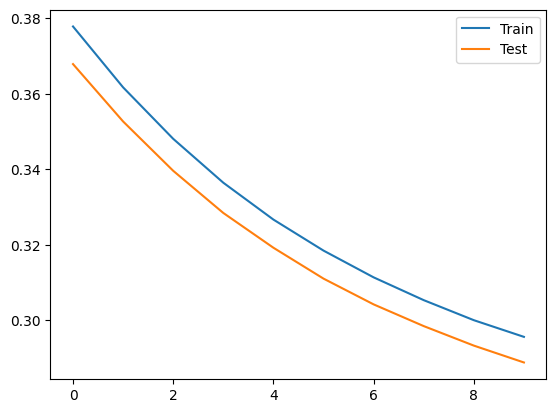

In [48]:
plt.plot(res.history['loss'], label = 'Train')
plt.plot(res.history['val_loss'], label = 'Test')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

In [49]:
res.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

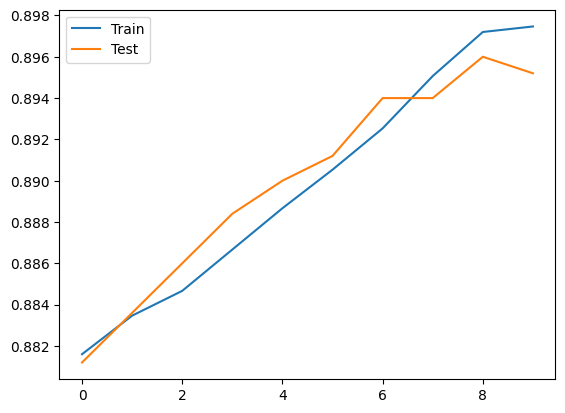

In [50]:
plt.plot(res.history['accuracy'], label = 'Train')
plt.plot(res.history['val_accuracy'], label = 'Test')
plt.legend();

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [51]:
X, y = make_classification(n_samples = 10_000,
                           n_features = 10,
                           n_classes = 3,
                           n_informative = 3,
                           random_state = 42)

### One-hot Encoding Targets
---

In `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function to achieve this.

In [55]:
y[:10]

array([0, 1, 2, 1, 2, 0, 0, 1, 1, 0])

In [56]:
y[:10]

y = to_categorical(y)

y[:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

### Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [61]:
input_shape = X_train_sc.shape

### Network Topology for Multi-class Classification
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer

For *all* multi-class classification problems, your output layer will be the same number of neurons as the number of classes in your problem. The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0.

In [69]:
model = Sequential()

# input/hidden layer
model.add(Dense(16,
                activation = 'relu',
                input_shape = (10,)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
# Output Layer!
# Multi-class classification! 1 Neuron PER class
model.add(Dense(3, # 1 Neuron per class (3)
                activation = 'softmax')) # softmax for multi-class!

### Compile your model
---

Whenever you compile your model, you have to specify a few things:
1. What loss function to use: For multi-class classification, use `categorical_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [70]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [71]:
res = model.fit(X_train_sc, y_train,
                epochs = 100,
                batch_size = 256,
                validation_data = (X_test_sc, y_test))

Epoch 1/100
30/30 [==============================] - 2s 10ms/step - loss: 1.0633 - acc: 0.4221 - val_loss: 1.0260 - val_acc: 0.4524
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9888 - acc: 0.4440 - val_loss: 0.9439 - val_acc: 0.4688
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9005 - acc: 0.5173 - val_loss: 0.8688 - val_acc: 0.5968
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 0.8331 - acc: 0.5973 - val_loss: 0.8221 - val_acc: 0.6068
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.7933 - acc: 0.6164 - val_loss: 0.7894 - val_acc: 0.6428
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 0.7633 - acc: 0.6469 - val_loss: 0.7603 - val_acc: 0.6632
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0.7323 - acc: 0.6897 - val_loss: 0.7288 - val_acc: 0.7072
Epoch 8/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6994 - 

In [72]:
preds = model.predict(X_test_sc)

preds.shape

79/79 [==============================] - 0s 4ms/step


(2500, 3)

In [73]:
np.round(preds[0, :], 3)

array([0.947, 0.002, 0.05 ], dtype=float32)

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

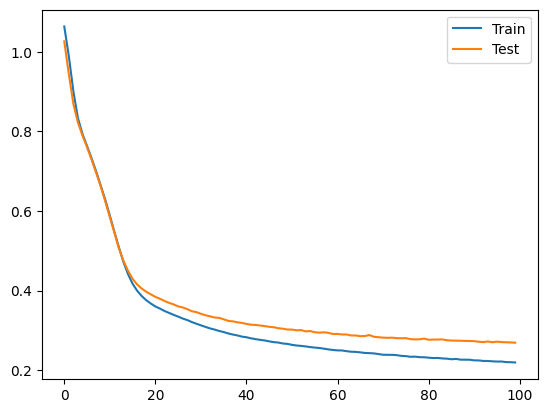

In [74]:
plt.plot(res.history['loss'], label = 'Train')
plt.plot(res.history['val_loss'], label = 'Test')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

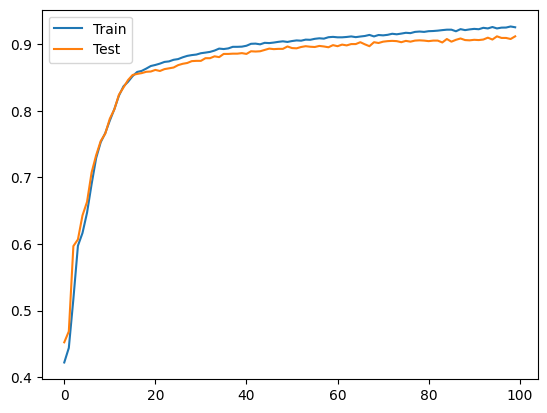

In [75]:
plt.plot(res.history['acc'], label = 'Train')
plt.plot(res.history['val_acc'], label = 'Test')
plt.legend();